### Gerekli Kütüphanelerin yüklenmesi

In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model,save_model

from keras.callbacks import CSVLogger
from sklearn.metrics import confusion_matrix

### ImageGenerator yardımıyla verilerin normalizasyonu ve düzenlenmesi

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_path = r"C:\Users\D4rkS\Desktop\python evr\UrbanDataset_tr_tst_val\train"
test_path = r"C:\Users\D4rkS\Desktop\python evr\UrbanDataset_tr_tst_val\test"
valid_path = r"C:\Users\D4rkS\Desktop\python evr\UrbanDataset_tr_tst_val\val"
batch_size = 32
target_size = (64,64)

In [4]:
train = train_data_gen.flow_from_directory(
        train_path,
        target_size = target_size,
        shuffle=False,
        batch_size=batch_size,
        class_mode="categorical")

Found 6111 images belonging to 10 classes.


In [5]:
test = test_data_gen.flow_from_directory(
        test_path,
        shuffle=False,
        target_size = target_size,
        batch_size=batch_size,
        class_mode="categorical")

Found 877 images belonging to 10 classes.


In [6]:
valid = valid_data_gen.flow_from_directory(
        valid_path,
        shuffle=False,
        target_size = target_size,
        batch_size=batch_size,
        class_mode="categorical")

Found 1744 images belonging to 10 classes.


In [ ]:
# Buradaki kod mevcut python ortamının GPU kullanımı ile ilgili, conda kullanıyorsanız ve çalışma ortamınızı biliyorsanız gerek yok 
"""
def setup_gpus():
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            tf.config.experimental.set_visible_devices(gpus[0],'GPU')
            tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1500)])
        except RuntimeError as e:
            print(e)
"""

### Model Oluşturma

In [7]:
# Erken durdurma ve en eğitim modelini yakalamak için earlystop ve modelCheckpoint kullanımı için gerekli tanımlamalar
earlyStopping = EarlyStopping(monitor="val_loss",
                              patience=30,
                              verbose=1,
                              mode="min")

model_check = ModelCheckpoint("best_model",
                              monitor="val_accuracy",
                              mode="max",
                              verbose=1,
                              save_weights_only=False)

In [8]:
# Burada birkaç deneme sonucunda kabuledilebilir sonuçlar veren model eğitime sokulmuştur:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),strides=(1,1),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),strides=(1,1),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128,(3,3),strides=(1,1),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
#model.add(Conv2D(128,(3,3),strides=(1,1),activation="relu"))
#model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
#model.add(Dense(256,activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [9]:
# Modelin compile edilmesi ve özetinin ekrana yazılması
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       7

### Model eğitimi ve modelin kaydedilmesi

In [10]:
csv_logger = CSVLogger('training.log', separator=',', append=False)
history = model.fit(train,epochs=250,
                    validation_data=valid,
                    verbose=1,
                    batch_size=32,
                    callbacks=[csv_logger,earlyStopping]
                    )
model.save('model_11')


Epoch 1/250
191/191 [==============================] - 87s 440ms/step - loss: 1.7550 - accuracy: 0.3564 - val_loss: 1.3278 - val_accuracy: 0.5642
Epoch 2/250
191/191 [==============================] - 84s 440ms/step - loss: 1.1899 - accuracy: 0.5816 - val_loss: 0.9820 - val_accuracy: 0.6823
Epoch 3/250
191/191 [==============================] - 80s 416ms/step - loss: 0.9693 - accuracy: 0.6730 - val_loss: 0.8372 - val_accuracy: 0.7391
Epoch 4/250
191/191 [==============================] - 81s 423ms/step - loss: 0.8131 - accuracy: 0.7241 - val_loss: 0.7686 - val_accuracy: 0.7443
Epoch 5/250
191/191 [==============================] - 84s 442ms/step - loss: 0.7346 - accuracy: 0.7521 - val_loss: 0.6916 - val_accuracy: 0.7729
Epoch 6/250
191/191 [==============================] - 85s 443ms/step - loss: 0.6477 - accuracy: 0.7817 - val_loss: 0.6810 - val_accuracy: 0.7873
Epoch 7/250
191/191 [==============================] - 85s 445ms/step - loss: 0.5787 - accuracy: 0.8025 - val_loss: 0.5513 -

Epoch 57/250
191/191 [==============================] - 70s 365ms/step - loss: 0.1097 - accuracy: 0.9656 - val_loss: 0.3304 - val_accuracy: 0.9157
Epoch 58/250
191/191 [==============================] - 70s 366ms/step - loss: 0.0886 - accuracy: 0.9683 - val_loss: 0.4016 - val_accuracy: 0.8997
Epoch 59/250
191/191 [==============================] - 70s 364ms/step - loss: 0.1171 - accuracy: 0.9661 - val_loss: 0.4002 - val_accuracy: 0.9042
Epoch 60/250
191/191 [==============================] - 70s 366ms/step - loss: 0.1049 - accuracy: 0.9660 - val_loss: 0.4342 - val_accuracy: 0.8905
Epoch 61/250
191/191 [==============================] - 72s 374ms/step - loss: 0.1098 - accuracy: 0.9647 - val_loss: 0.3709 - val_accuracy: 0.9134
Epoch 00061: early stopping
INFO:tensorflow:Assets written to: model_11\assets


### Sonuçların analiz edilmesi

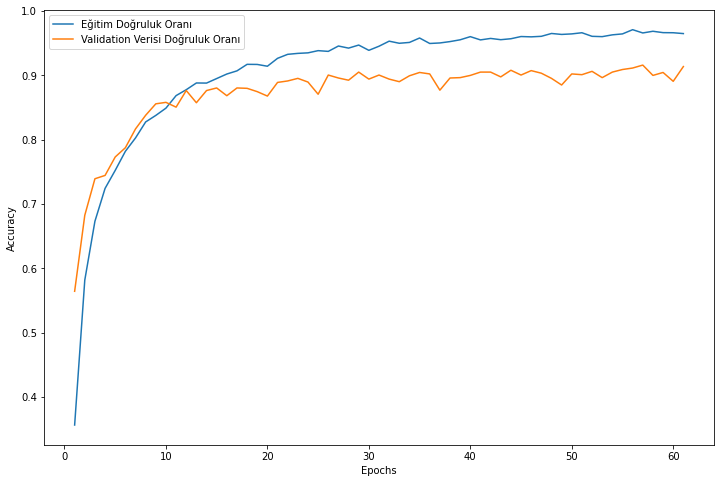

In [11]:
# Modelin eğitim ve validation için doğruluk grafiklerinin çizilmesi, olası overfitting durumunun analizi için
# Grafikten de anlaşılacağı üzere eğitim ve doğrulama grafikleri bir birine yakın seyretmekte, bu da istenilen birşey tabiki
acc = model.history.history["accuracy"]
acc_val = model.history.history["val_accuracy"]
epochs = range(1,len(acc)+1)

plt.figure(figsize = (12,8))
plt.plot(epochs,acc,label="Eğitim Doğruluk Oranı")
plt.plot(epochs,acc_val,label="Validation Verisi Doğruluk Oranı")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

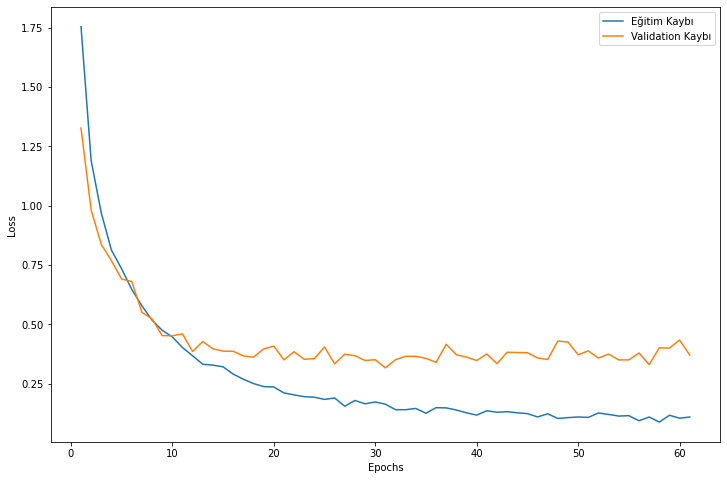

In [12]:
# Aynı şekilde modelin eğitim ve doğrulama'daki kayıpların görselleştirilmesi de bir birine yakın

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(acc)+1)

plt.figure(figsize = (12,8))
plt.plot(epochs,loss,label="Eğitim Kaybı")
plt.plot(epochs,val_loss,label="Validation Kaybı")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [14]:
# test için ayırtdığımız verinin doğruluk ve kayıp değerlerinin hesaplanması
model.evaluate(test) 

28/28 [==============================] - 9s 301ms/step - loss: 0.4118 - accuracy: 0.8928


[0.41183239221572876, 0.892816424369812]